In [1]:
import pandas as pd
df_train = pd.read_csv('data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Sex(性別)とEmbarked(乗船場所)はダミー変数化させる
sex_dum = pd.get_dummies(df_train['Sex'])
df_train_proc = pd.concat((df_train, sex_dum), axis=1)
df_train_proc = df_train_proc.drop('Sex', axis=1)
df_train_proc = df_train_proc.drop('female', axis=1)
df_train_proc.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [3]:
emb_dum = pd.get_dummies(df_train['Embarked'])
df_train_proc = pd.concat((df_train_proc, emb_dum), axis=1)
df_train_proc = df_train_proc.drop('Embarked', axis=1)
df_train_proc = df_train_proc.drop('S', axis=1)
df_train_proc.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0


In [4]:
# 残りの非構造化データはName, Ticket, Cabin
# Cabinは欠損が多いので除外してしまってもよさそう
df_train_proc.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
male             0
C                0
Q                0
dtype: int64

In [5]:
# ここで欠損データを除外し、予測したいSurvivedと相関のあるデータを探す
df_train_proc_dn = df_train_proc.dropna()
df_train_proc_dn = df_train_proc_dn.drop('PassengerId', axis=1)
df_train_proc_dn = df_train_proc_dn.drop('Name', axis=1)
df_train_proc_dn = df_train_proc_dn.drop('Ticket', axis=1)
df_train_proc_dn = df_train_proc_dn.drop('Cabin', axis=1)

df_train_proc_dn.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q
Survived,1.000000,-0.037227,-0.244604,0.100339,0.018723,0.134019,-0.535727,0.098712,-0.039232
Pclass,-0.037227,1.000000,-0.307590,-0.100324,0.049894,-0.315069,-0.041725,-0.228001,-0.038676
Age,-0.244604,-0.307590,1.000000,-0.161625,-0.274813,-0.091542,0.172307,0.076824,0.017855
SibSp,0.100339,-0.100324,-0.161625,1.000000,0.258993,0.285492,-0.095344,-0.050628,0.169778
Parch,0.018723,0.049894,-0.274813,0.258993,1.000000,0.388783,-0.081832,-0.068949,-0.065543
Fare,0.134019,-0.315069,-0.091542,0.285492,0.388783,1.000000,-0.129871,0.239531,0.015604
male,-0.535727,-0.041725,0.172307,-0.095344,-0.081832,-0.129871,1.000000,-0.053879,-0.002826
C,0.098712,-0.228001,0.076824,-0.050628,-0.068949,0.239531,-0.053879,1.000000,-0.076941
Q,-0.039232,-0.038676,0.017855,0.169778,-0.065543,0.015604,-0.002826,-0.076941,1.000000


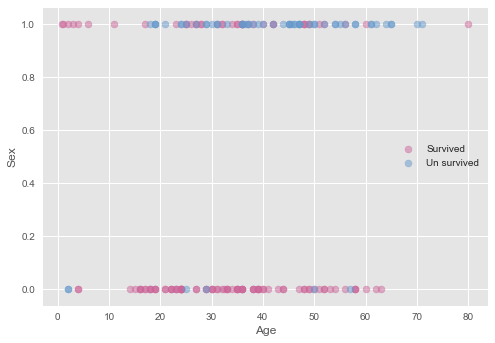

In [6]:
# 性別、次いで年齢の相関が高いとわかる
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

df_train_sur = df_train_proc_dn[df_train_proc_dn.Survived==1]
df_train_sur_age = df_train_sur.iloc[:, 2]
df_train_sur_sex = df_train_sur.iloc[:, 6]
plt.scatter(df_train_sur_age, df_train_sur_sex, color='#cc6699', alpha=0.5, label='Survived')

df_train_sur = df_train_proc_dn[df_train_proc_dn.Survived==0]
df_train_sur_age = df_train_sur.iloc[:, 2]
df_train_sur_sex = df_train_sur.iloc[:, 6]
plt.scatter(df_train_sur_age, df_train_sur_sex, color='#6699cc', alpha=0.5, label='Un survived')

plt.xlabel('Age')
plt.ylabel('Sex')
plt.legend(loc='right')
plt.show()

- 名前データから'mr', 'master', 'mrs', 'miss'のフラグを抽出
- 名前データから家族名を抽出し、そこから家族の(自分以外の)生存率を計算
- 敬称によって分けられたフラグ別に, k-近傍法で年齢を推測補完

In [7]:
def name_classifier(name_df):
    name_classifier_df = pd.DataFrame(columns={'mr', 'master', 'mrs', 'miss'})
    for name in name_df:
        if 'Mr' in name:
            df = pd.DataFrame([[1, 0, 0, 0]], columns={'mr', 'master', 'mrs', 'miss'})
        if 'Master' in name:
            df = pd.DataFrame([[0, 1, 0, 0]], columns={'mr', 'master', 'mrs', 'miss'})
        if 'Mrs' in name:
            df = pd.DataFrame([[0, 0, 1, 0]], columns={'mr', 'master', 'mrs', 'miss'})
        if 'Miss' in name:
            df = pd.DataFrame([[0, 0, 0, 1]], columns={'mr', 'master', 'mrs', 'miss'})
        else:
            df = pd.DataFrame([[0, 0, 0, 0]], columns={'mr', 'master', 'mrs', 'miss'})
        name_classifier_df = name_classifier_df.append(df, ignore_index=True)
    return name_classifier_df

In [ ]:
[].index